## Importing the libraries needed


In [ ]:
!pip install ktrain

In [ ]:
import ktrain
from ktrain import text
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

## Creating the dataframe objects for training and testing

In [ ]:
training_set = pd.read_csv('training.csv',encoding="UTF-8")
testing_set = pd.read_csv('testing.csv', encoding="UTF-8")

## Splitting the dataframe into a training set and a validation set by 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training_set['encabezado'], training_set['clase'], shuffle = True, test_size = 0.2)

## Converting data to features for RoBERTa and loading it into a model

In [ ]:
X_train = numpy.array(X_train)
X_test = numpy.array(X_test)
y_train = numpy.array(y_train)
y_test = numpy.array(y_test)

In [ ]:
t = text.Transformer('xlm-roberta-base', maxlen = 128, class_names = ['0', '1'])
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)
model = t.get_classifier()

preprocessing train...
language: es
train sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 17


Is Multi-Label? False
preprocessing test...
language: es
test sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 16


In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

## Finding the best learning rate for the model

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
99/99 [==============================] - 68s 469ms/step - loss: 0.6947 - accuracy: 0.4880
Epoch 2/1024
99/99 [==============================] - 47s 479ms/step - loss: 0.6946 - accuracy: 0.5044
Epoch 3/1024
99/99 [==============================] - 47s 476ms/step - loss: 0.6917 - accuracy: 0.5101
Epoch 4/1024
99/99 [==============================] - 47s 478ms/step - loss: 0.6795 - accuracy: 0.5657
Epoch 5/1024
99/99 [==============================] - 47s 477ms/step - loss: 0.4270 - accuracy: 0.8384
Epoch 6/1024
99/99 [==============================] - 47s 477ms/step - loss: 0.2718 - accuracy: 0.9104
Epoch 7/1024
99/99 [==============================] - 47s 477ms/step - loss: 0.2925 - accuracy: 0.8933
Epoch 8/1024
99/99 [==============================] - 47s 478ms/step - loss: 0.4722 - accuracy: 0.7891
Epoch 9/1024
99/99 [==============================] - 47s 476ms/step - loss: 0.6440 - accurac

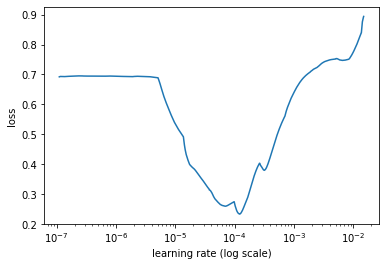

In [ ]:
learner.lr_find(show_plot=True)

Three possible suggestions for LR from plot:
	Longest valley (red): 1.27E-05
	Min numerical gradient (purple): 1.00E-05
	Min loss divided by 10 (omitted from plot): 1.21E-05


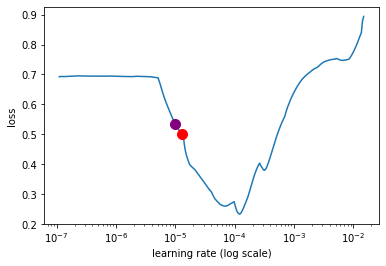

In [ ]:
learner.lr_plot(suggest='true')

## Fine-tuning the model

In [ ]:
learner.autofit(1.00E-05)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
99/99 [==============================] - 74s 577ms/step - loss: 0.6945 - accuracy: 0.4981 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/1024
99/99 [==============================] - 50s 508ms/step - loss: 0.6892 - accuracy: 0.5473 - val_loss: 0.6749 - val_accuracy: 0.7424
Epoch 3/1024
99/99 [==============================] - 52s 524ms/step - loss: 0.5210 - accuracy: 0.7759 - val_loss: 0.3639 - val_accuracy: 0.8561
Epoch 4/1024
99/99 [==============================] - 50s 507ms/step - loss: 0.2802 - accuracy: 0.9003 - val_loss: 0.2567 - val_accuracy: 0.8990
Epoch 5/1024
99/99 [==============================] - 49s 491ms/step - loss: 0.2060 - accuracy: 0.9299 - val_loss: 0.2774 - val_accuracy: 0.9066
Epoch 6/1024
99/99 [==============================] - 51s 514ms/step - loss: 0.1486 - accur

## Validation process

In [ ]:
learner.validate(val_data = val)

13/13 [==============================] - 4s 114ms/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       198
           1       0.93      0.95      0.94       198

    accuracy                           0.94       396
   macro avg       0.94      0.94      0.94       396
weighted avg       0.94      0.94      0.94       396



array([[184,  14],
       [  9, 189]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, t)

In [ ]:
test_headlines = numpy.array(testing_set['encabezado'])
test_class = numpy.array(testing_set['clase'])

In [ ]:
p = predictor.predict(test_headlines)

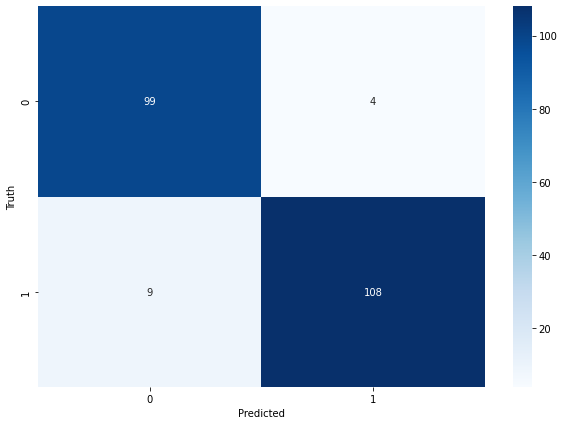

In [ ]:
cm = confusion_matrix(p, test_class)
fig, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Truth')
fig.savefig('cm.png')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(test_class, p))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       108
           1       0.92      0.96      0.94       112

    accuracy                           0.94       220
   macro avg       0.94      0.94      0.94       220
weighted avg       0.94      0.94      0.94       220

